In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)


In [11]:
df = pd.read_csv("credit_risk_dataset.csv")
df = df.dropna()  


In [12]:
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=['loan_status'])
y = df['loan_status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [13]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

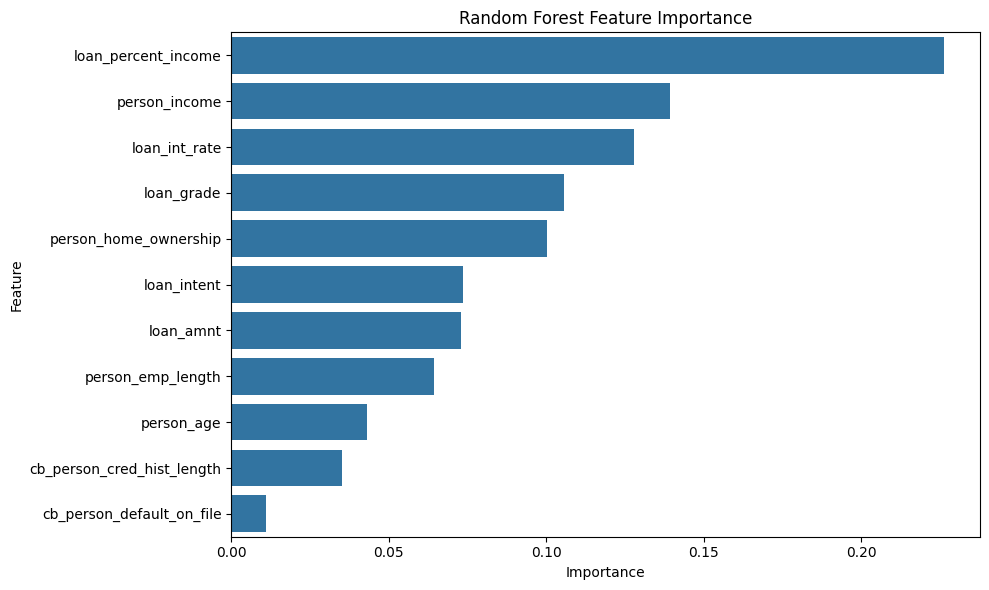

In [14]:
# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()


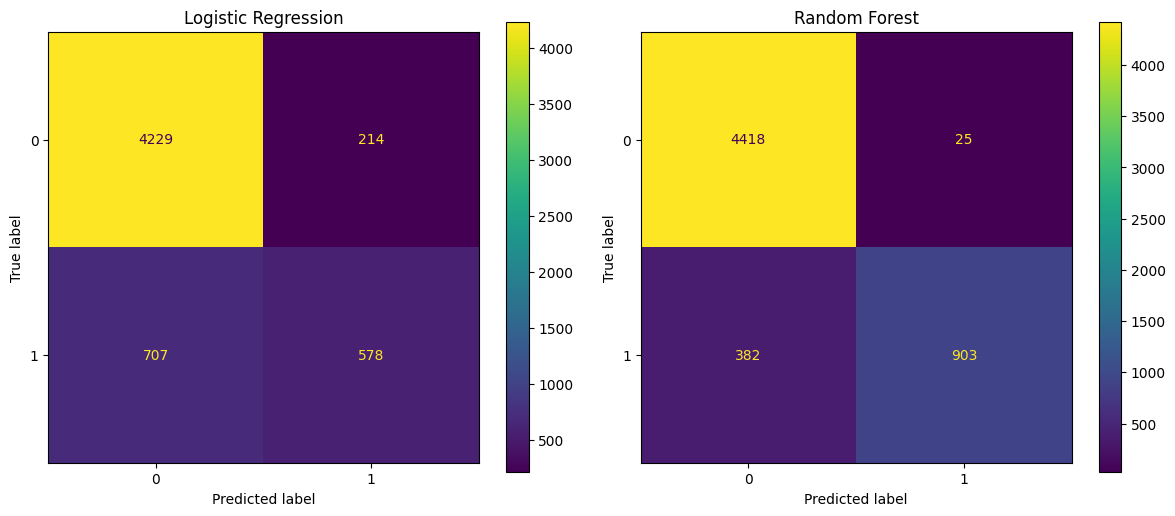

In [15]:
# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, lr.predict(X_test), ax=axes[0])
axes[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_predictions(y_test, rf.predict(X_test), ax=axes[1])
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.savefig("confusion_matrices.png")
plt.show()


<Figure size 800x600 with 0 Axes>

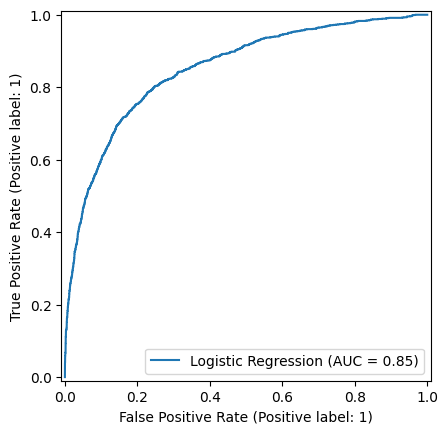

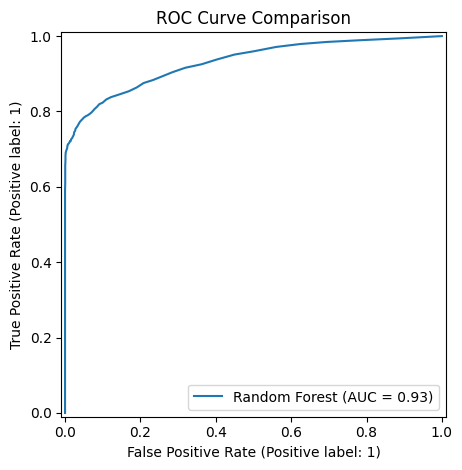

In [16]:
# ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(lr, X_test, y_test, name="Logistic Regression")
RocCurveDisplay.from_estimator(rf, X_test, y_test, name="Random Forest")
plt.title("ROC Curve Comparison")
plt.tight_layout()
plt.savefig("roc_curves.png")
plt.show()


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      4443
           1       0.98      0.71      0.82      1285

    accuracy                           0.93      5728
   macro avg       0.95      0.85      0.89      5728
weighted avg       0.93      0.93      0.93      5728



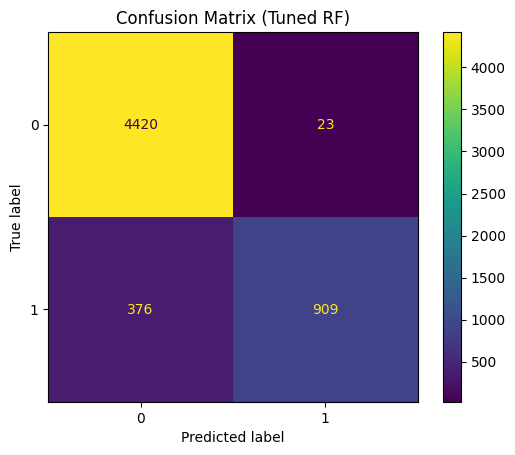

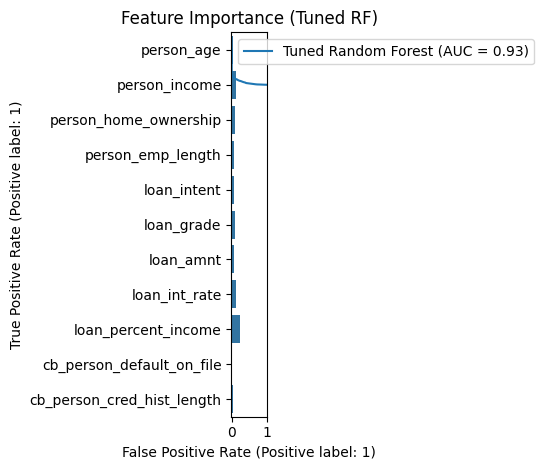

In [17]:
# Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Evaluating Tuned Model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay
import seaborn as sns

print("Tuned Random Forest Report:")
print(classification_report(y_test, best_rf.predict(X_test)))

# Confusion Matrix (Tuned)
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("Confusion Matrix (Tuned RF)")
plt.savefig("conf_matrix_tuned.png")

# ROC Curve (Tuned)
RocCurveDisplay.from_estimator(best_rf, X_test, y_test, name="Tuned Random Forest")
plt.title("ROC Curve (Tuned RF)")
plt.savefig("roc_curve_tuned.png")

#Feature Importance Plot (Tuned)
importances = best_rf.feature_importances_
feature_names = X.columns if hasattr(X, "columns") else [f"feature_{i}" for i in range(X.shape[1])]
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Tuned RF)")
plt.tight_layout()
plt.savefig("feature_importance_tuned.png")
